# <span style="color:orange"> Quantitative Comparison of BGFR algorithms // *For SC QSM* </span> </br>
This notebook uses masks and a ground truth local field to compare the accuracy of different BGFR algorithms developed for Brain QSM, this algorithms are mostly implemented in Sepia Toolbox: </br>
https://sepia-documentation.readthedocs.io/en/latest/index.html </br>

We will load the ground truth Local field, extract metrics and compare the offset of white matter and gray matter on the Local fields! </br>

In the local field, higher value relates to paramagnetic reaction to the magnetic field B0 whereas diamagnetic materials will show lower values on the field. </br>

Throught his, it is expected that gray matter has higher frequency values than that of white matter and spinal cord CSF surrounding the spinal cord structure. </br>

Remember that this depends on the sign convention. We are using the rotating MR frame of reference where paramagnetic materials will show as positive and diamagnetic as negative.

In [2]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import pandas as pd
from utils.extract_metric import extract_metrics

In [3]:
import utils.qsm_testing_display_slices
import importlib
importlib.reload(utils.qsm_testing_display_slices)

<module 'utils.qsm_testing_display_slices' from '/Users/soothsayer7/msc_rios/Image-processing-strategies/qsm_testing/utils/qsm_testing_display_slices.py'>

## <span style="color:#EF9A9A"> Fieldmap used for simulations </span> </br>
This use Fieldmaps calcualted with ROMEO

In [4]:
# Load the mask data for metric auto-calculation with image
wm_mask_path = r"E:\msc_data\sc_qsm\new_gauss_sims\mrsim_outpus/wm_mask_crop.nii.gz"
gm_mask_path = r"E:\msc_data\sc_qsm\new_gauss_sims\mrsim_outpus/gm_mask_crop.nii.gz"

eroded_mac_wm_mask_path = r"/Users/soothsayer7/msc_rios/msc_data_mac_processing/final_wm_mask.nii.gz"
mac_gm_path = r"/Users/soothsayer7/msc_rios/msc_data_mac_processing/gm_mask.nii.gz"

#utils.qsm_testing_display_slices.load_gm_wm_masks(gm_mask_path, wm_mask_path)
utils.qsm_testing_display_slices.load_gm_wm_masks(mac_gm_path, eroded_mac_wm_mask_path)

In [49]:
# Load the fieldmap:
ideal_acq_params_fm_data = nib.load(r"E:\msc_data\sc_qsm\new_gauss_sims\gt_ref_avg_sc\gt_gauss_lf_Hz_swiss_crop.nii.gz").get_fdata()
#swiss_acq_params_fm = nib.load(r"")

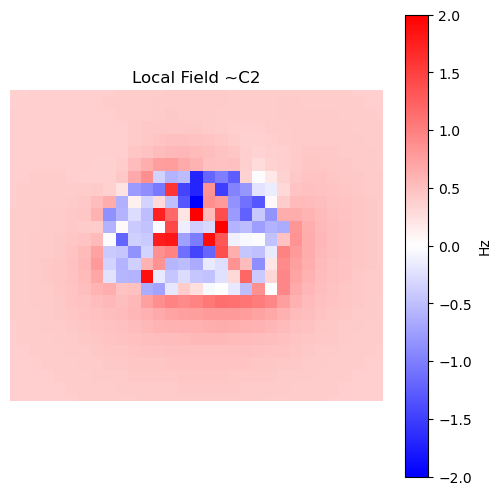

GM Mean: 0.9421 ppm
WM Mean: -0.6088 ppm


In [50]:
utils.qsm_testing_display_slices.display_local_field(ideal_acq_params_fm_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

## <span style="color:#FFCC80"> BGFR for Swiss Invivo Acq. </span> </br>

In [5]:
# Now we can load all the Local Fields to compare,
# Let's start by loading the initial runs which use SEPIA default parameters
#swiss_invivo_opt_lbv_data = nib.load(r"/Volumes/Soothsayer/msc_data/sc_qsm/Swiss_data/may_2025_reprocess/BGFR/SHARP/test1/Sepia_localfield.nii.gz").get_fdata()
#swiss_invivo_opt_vsharp_data
#swiss_invivo_opt_pdf_data
#swiss_invivo_opt_resharp_data
swiss_invivo_opt_sharp_data = nib.load(r"/Users/soothsayer7/msc_rios/msc_data_mac_processing/may_2025_mac_processing/BGFR/opt_SHARP/Sepia_localfield.nii.gz").get_fdata()
swiss_invivo_def_sharp_data = nib.load(r"/Users/soothsayer7/msc_rios/msc_data_mac_processing/may_2025_mac_processing/BGFR/def_SHARP/Sepia_localfield.nii.gz").get_fdata()

### <span style="color:#29B6F6"> LBV Results </span> </br>

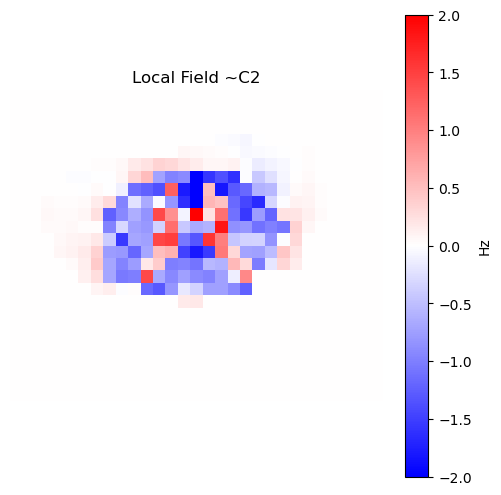

In [ ]:
utils.qsm_testing_display_slices.display_local_field(initial_LBV_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

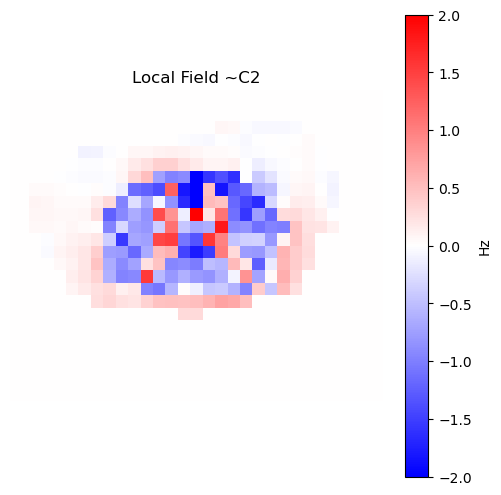

In [12]:
utils.qsm_testing_display_slices.display_local_field(best_LBV_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

### <span style="color:#9EC771"> VSHARP Results </span> </br>

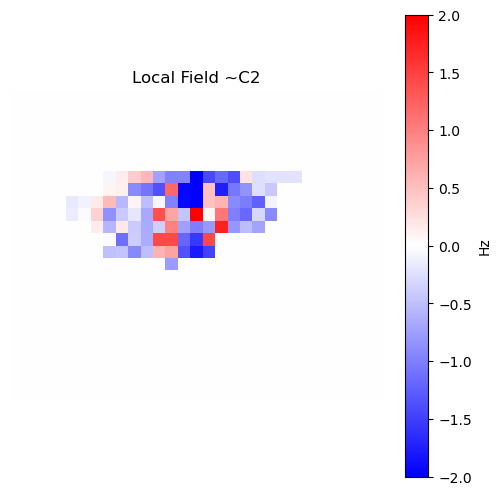

In [15]:
utils.qsm_testing_display_slices.display_local_field(initial_VSHARP_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

In [18]:
gm_mean_initial_vsharp = np.mean(initial_VSHARP_LF_data[gm_mask_data == 1])
wm_mean_initial_vsharp = np.mean(initial_VSHARP_LF_data[wm_mask_data == 1])
print("Initial VSHARP GM mean: ", gm_mean_initial_vsharp)
print("Initial VSHARP WM mean: ", wm_mean_initial_vsharp)

Initial VSHARP GM mean:  0.16043546439005277
Initial VSHARP WM mean:  -0.18097493251561145


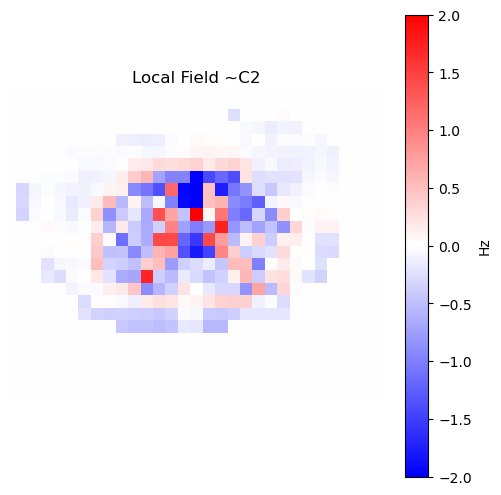

In [16]:
utils.qsm_testing_display_slices.display_local_field(best_VSHARP_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

In [27]:
gm_mean_best_vsharp = np.mean(best_VSHARP_LF_data[gm_mask_data == 1])
wm_mean_best_vsharp = np.mean(best_VSHARP_LF_data[wm_mask_data == 1])
print("Best VSHARP GM mean: ", gm_mean_best_vsharp)
print("Best VSHARP WM mean: ", wm_mean_best_vsharp)

Best VSHARP GM mean:  0.5268117669233451
Best VSHARP WM mean:  -0.47057656649281526


### <span style="color:#FF5722"> PDF Results </span> </br>

In [50]:
# Loading other data
initial_swiss_PDF_LF_data = nib.load(r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\MR_simulations\sim_data\QSM_processing\mrsim_outputs\in_vivo_acq_params\BGFR_tests\PDF\test1_def/Sepia_localfield.nii.gz").get_fdata()
best_swiss_PDF_LF_data = nib.load(r"E:\msc_data\sc_qsm\Swiss_data\march_25_re_process\MR_simulations\sim_data\QSM_processing\mrsim_outputs\in_vivo_acq_params\BGFR_tests\PDF\optimized_params/Sepia_localfield.nii.gz").get_fdata()

Ideal variables for plotting: </br>
initial_PDF_LF_data </br>
best_PDF_LF_data

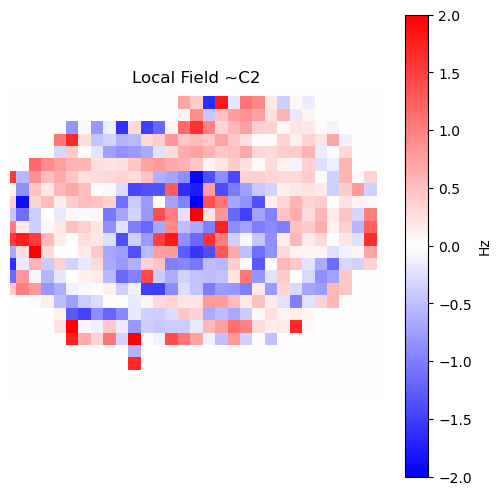

In [23]:
utils.qsm_testing_display_slices.display_local_field(initial_PDF_LF_data, img_class="in_vivo", slice_index=32, cmap_min=-2, cmap_max=2)

In [28]:
gm_mean_initial_PDF = np.mean(initial_PDF_LF_data[gm_mask_data == 1])
wm_mean_initial_PDF = np.mean(initial_PDF_LF_data[wm_mask_data == 1])
print("Initial PDF GM mean: ", gm_mean_initial_PDF)
print("Initial PDF WM mean: ", wm_mean_initial_PDF)

Initial PDF GM mean:  0.5955790437416305
Initial PDF WM mean:  -0.8505312735080931


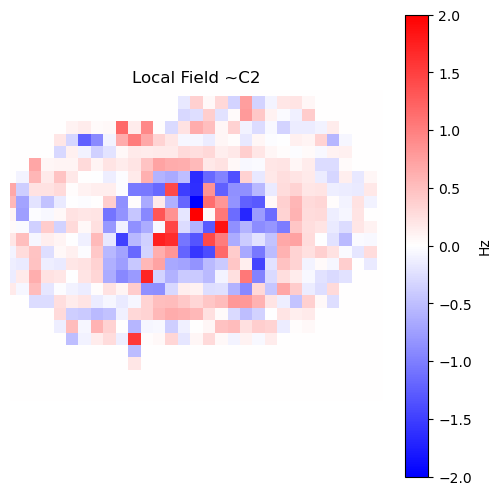

In [25]:
utils.qsm_testing_display_slices.display_local_field(best_PDF_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

In [29]:
gm_mean_best_PDF = np.mean(best_PDF_LF_data[gm_mask_data == 1])
wm_mean_best_PDF = np.mean(best_PDF_LF_data[wm_mask_data == 1])
print("Best PDF GM mean: ", gm_mean_best_PDF)
print("Best PDF WM mean: ", wm_mean_best_PDF)

Best PDF GM mean:  0.784936595152394
Best PDF WM mean:  -0.6909394088687073


### <span style="color:#CE93D8"> Sharp Results </span> </br>


In [6]:
utils.qsm_testing_display_slices.display_local_field(swiss_invivo_opt_sharp_data, img_class="swiss_in_vivo", slice_index=12, cmap_min=-2, cmap_max=2)

GM Mean: 0.0888 ppm
WM Mean: -0.0094 ppm


In [7]:
utils.qsm_testing_display_slices.display_local_field(swiss_invivo_def_sharp_data, img_class="swiss_in_vivo", slice_index=12, cmap_min=-2, cmap_max=2)

GM Mean: 0.0005 ppm
WM Mean: 0.0000 ppm


### <span style="color:#9C27B0"> RESHARP Results </span> </br>


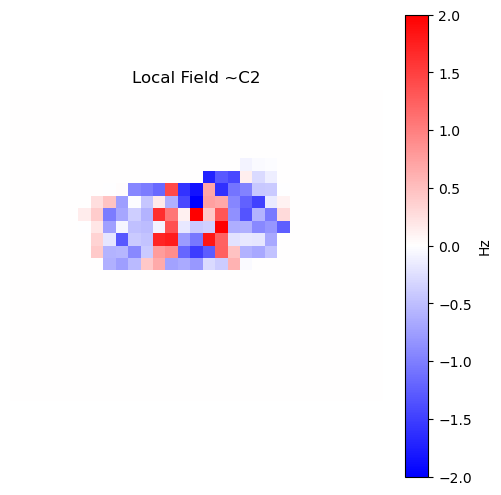

GM Mean: 0.2623 ppm
WM Mean: -0.2097 ppm


In [59]:
utils.qsm_testing_display_slices.display_local_field(initial_RESHARP_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

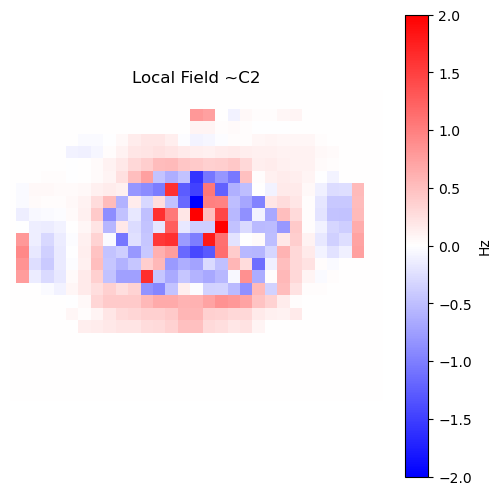

GM Mean: 0.8183 ppm
WM Mean: -0.6052 ppm


In [62]:
utils.qsm_testing_display_slices.display_local_field(best_RESHARP_LF_data, img_class="sim_ideal", slice_index=32, cmap_min=-2, cmap_max=2)

# <span style="color:#3C8D40"> RATEUS INC </span> </br> <span style="color:#000000"> RATEUS INC